In [1]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np

# machine learning imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils

# graphing tools
import seaborn as sns
from scipy.stats import sem
import matplotlib
import scienceplots


plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')

# time
import time

In [2]:
# DIRECTORY FOR PICKLED FILES
dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

In [3]:

plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')
# importing the NN
from NN_tools import NN_data, NN_data_iteration
from NN_tools import NN_optimised_parameters, NN_default_parameters, one_hot_enc_labels_bow, one_hot_enc_labels_tf
from NN_tools import convert_to_preferred_format, nn_graph, nn_graph_loss, NN_data_ck, NN_ck, nn_graph_general, NN_data_iteration_strat
from NN_tools import NN_optimised_parameters_al, NN_optimised_parameters_epist

In [4]:
#Y1
dir_csv_y1 = 'outputs/labels_cleaned_y2.csv'
df_y1     = pd.read_csv(dir_csv_y1, encoding='utf-8')

#Y2
dir_csv_y2 = 'outputs/labels_cleaned_y2.csv'
df_y2      = pd.read_csv(dir_csv_y2, encoding='utf-8')


#Y1Y2
dir_csv_y1y2 = 'outputs/labels_cleaned_y1y2.csv'
df_y1y2      = pd.read_csv(dir_csv_y1y2, encoding='utf-8')

In [5]:
labels = ['ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
#labels2 = ['ArgumentLevel','ReasoningLevel','ArgumentLevel','ReasoningLevel'] # 'ArgumentLevel', 'ReasoningLevel'
features = ['tfidf','bow'] #'bow', 'ifidf'
num_epochs = 10
num_iter   = 40
# num_epochs = 3
# num_iter   = 2
train_sizes = [0.3,0.4, 0.5,0.6,0.7,0.8,0.9] # proportion of training data

# YEAR1 Argument Level 

In [6]:
accuracies     = []
accuracies_sd  = []
loss           = []
val_loss       = []
ck             = []

feature2 = []
labels2  = []


times = []

label = 'ArgumentLevel'
for feature in features:
    # -- Feature extraction: TF-IDF ---
    if feature ==  'tfidf':

        starttime = time.time()
        wordvec_names, wordvec_counts = np.array(ml_tools.tf_idf(df_y1['Content'].tolist()), dtype = object)
        y_tf                          = one_hot_enc_labels_tf(df_y1, label)
        print(y_tf.shape)

        print('tfidf')

        # NN training 
        t = NN_data_iteration(NN_optimised_parameters_al,  wordvec_counts, y_tf, 
                        train_sizes, num_epochs,num_iter, label, feature, 'y1', dir_name_e) 
        
        # adding results to list
        accuracies.append(t['accuracy'])
        accuracies_sd.append(t['sem'])
        loss.append(t['loss'])
        val_loss.append(t['valloss'])
        #ck.append(t['ck'])

        # column titles
        feature2.append(feature)
        labels2.append(label)

        endtime = (time.time() - starttime)/60
        times.append(convert_to_preferred_format(endtime))
        print('tfidf done')

    # -- Feature extraction: Bag of Words ---
    elif feature == 'bow':
        starttime = time.time()
        wordvec_names, wordvec_counts = np.array(ml_tools.BoW(df_y1['Content'].tolist()), dtype = object)
        y_b                           = one_hot_enc_labels_bow(df_y1, label)
    
        print('bow')

        # NN training 
        t = NN_data_iteration(NN_optimised_parameters_al,  wordvec_counts, y_b, 
                        train_sizes, num_epochs, num_iter, label, feature, 'y1', dir_name_e )
        # t2 = NN_data_ck(NN_ck, wordvec_counts, y_b, train_sizes, num_epochs, 'y1'  )            
        
        # adding results to list
        accuracies.append(t['accuracy'])
        accuracies_sd.append(t['sem'])
        loss.append(t['loss'])
        val_loss.append(t['valloss'])
        #ck.append(t['ck'])

        # column titles
        feature2.append(feature)
        labels2.append(label)

        endtime = time.time() - starttime
        times.append(convert_to_preferred_format(endtime))
        print('bow_done')

df_nn_y1 = pd.DataFrame({ 'Label': labels2, 'feature extraction':feature2, 'accuracy':accuracies, 'sem': accuracies_sd, 'loss': loss, 'val_loss': val_loss, 'time':times})

(83, 5)
tfidf
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                65424     
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
 flatten (Flatten)           (None, 5)                 0         
                                                                 
Total params: 65,573
Trainable params: 65,573
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.6042 - accuracy: 0.2500 - val_loss: 1.5949 - val_accuracy: 0.3729
Epoch 2/10
1/1 [=================

In [7]:
name_df_nn_y1  = 'W9_NN_{}_{}iterations_categorical_AL'.format('y1',num_epochs, num_iter)
pickle_df_nn_y1 = utils.save_as_pickle_file(df_nn_y1, name_df_nn_y1, dir_name_e)

In [8]:
unpickle_df_nn_y1_al_categorical = utils.load_pickle_file_to_df(name_df_nn_y1, dir_name_e)

In [9]:
print(unpickle_df_nn_y1_al_categorical)

           Label feature extraction  \
0  ArgumentLevel              tfidf   
1  ArgumentLevel                bow   

                                            accuracy  \
0  0    0.429688
1    0.404806
2    0.402797
3   ...   
1  0    0.408438
1    0.440810
2    0.443467
3   ...   

                                                 sem  \
0  0    0.004132
1    0.003611
2    0.003343
3   ...   
1  0    0.004724
1    0.004907
2    0.004873
3   ...   

                                                loss  \
0  0    1.568958
1    1.572038
2    1.569118
3   ...   
1  0    1.718623
1    1.630518
2    1.598717
3   ...   

                                            val_loss      time  
0  0    1.568958
1    1.572038
2    1.569118
3   ...  00:00:50  
1  0    1.718623
1    1.630518
2    1.598717
3   ...  00:20:07  


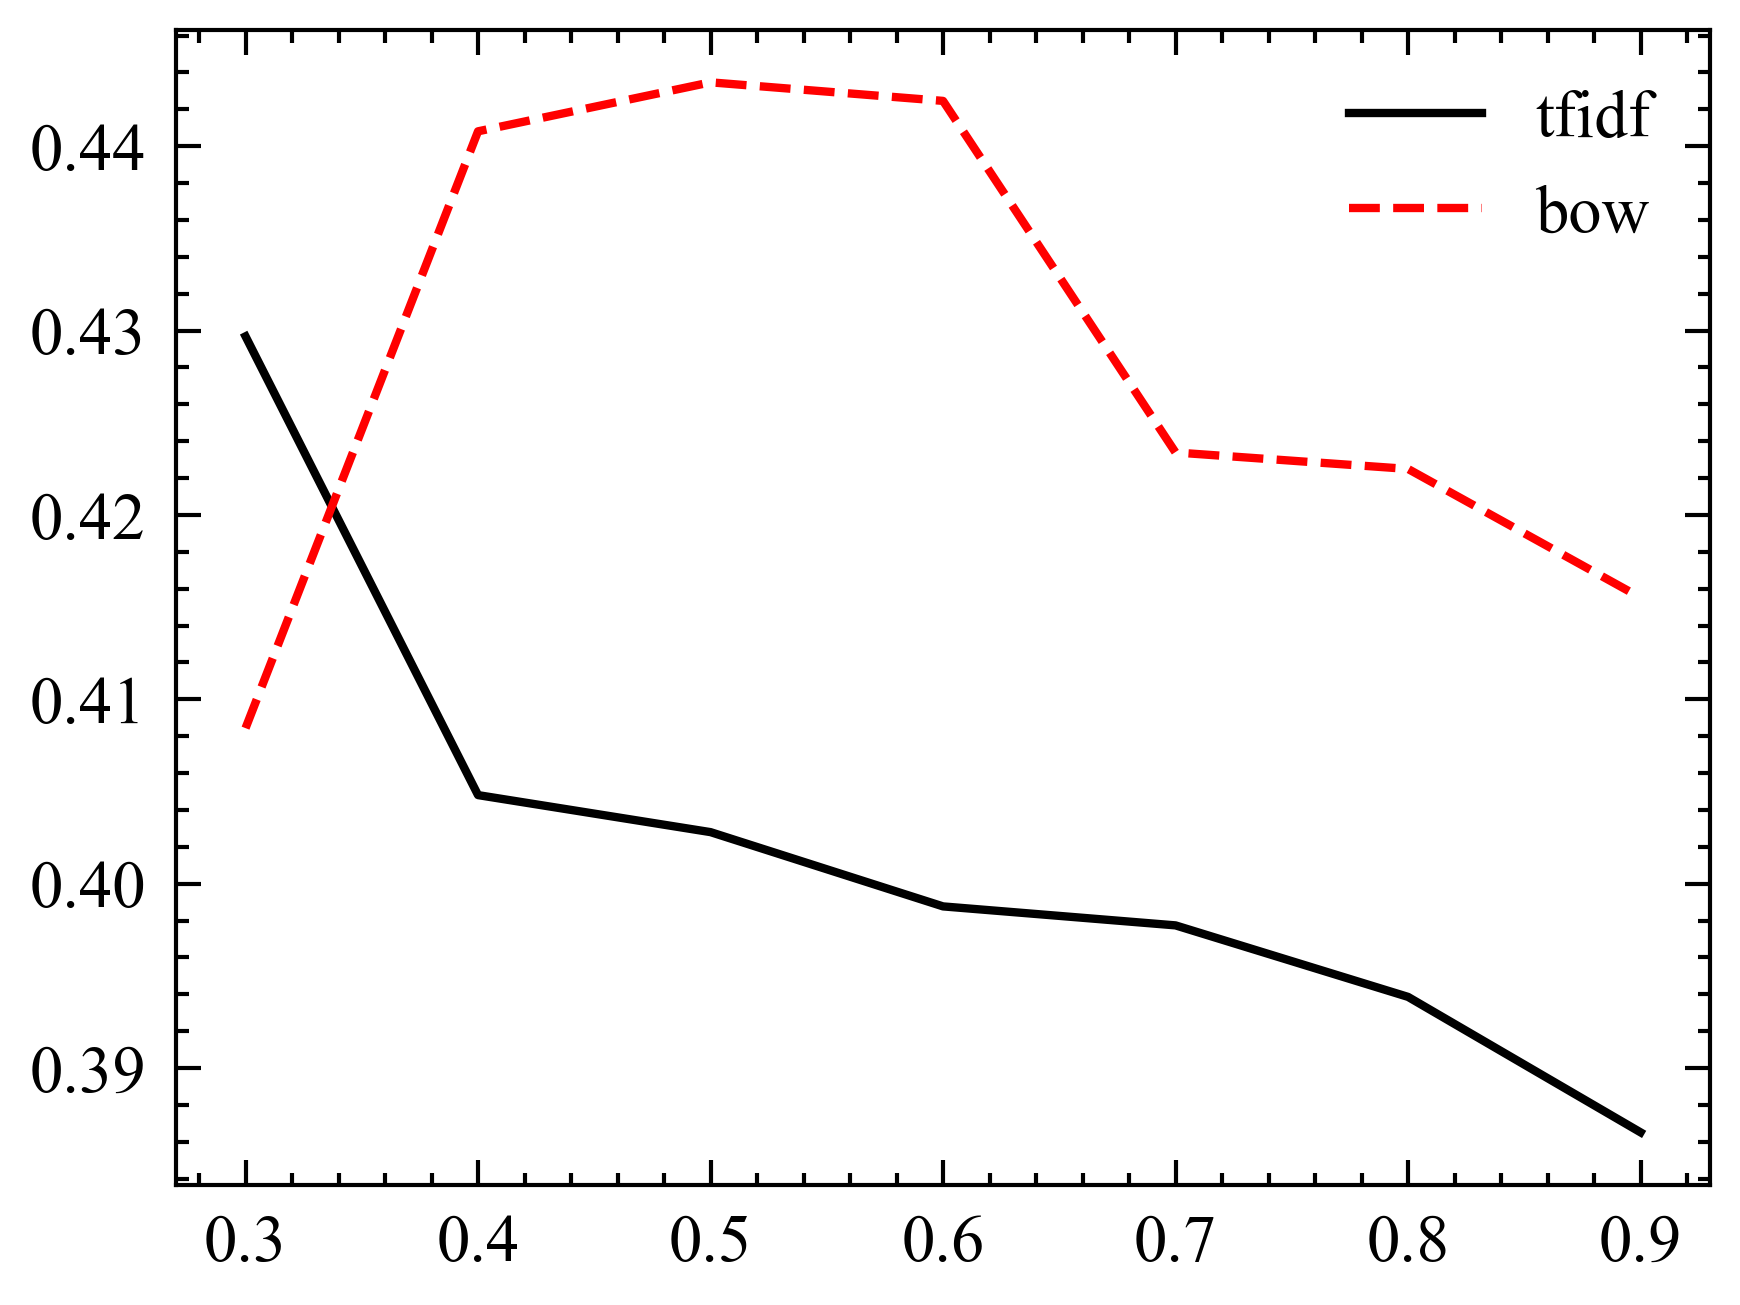

In [10]:
plt.plot(train_sizes, unpickle_df_nn_y1_al_categorical.iloc[0]['accuracy'], label = 'tfidf')
plt.plot(train_sizes, unpickle_df_nn_y1_al_categorical.iloc[1]['accuracy'], label = 'bow')
#plt.plot(train_sizes, unpickle_df_nn_y1_al_categorical.iloc[1]['loss'], label = 'loss_bow')
#plt.plot(train_sizes, unpickle_df_nn_y1_al_categorical.iloc[1]['val_loss'], label = 'valloss_bow')
plt.legend()
plt.show()


In [11]:
path_nn= 'outputs/NN_multiclass_y1_csv_file_AL_only.csv'
unpickle_df_nn_y1_al_categorical.to_csv(path_nn, encoding = 'utf-8')

# Year 1 Epistemology

In [13]:
accuracies     = []
accuracies_sd  = []
loss           = []
val_loss       = []
ck             = []

feature2 = []
labels2  = []


times = []

label = 'ReasoningLevel'
for feature in features:
    # -- Feature extraction: TF-IDF ---
    if feature ==  'tfidf':

        starttime = time.time()
        wordvec_names, wordvec_counts = np.array(ml_tools.tf_idf(df_y1['Content'].tolist()), dtype = object)
        y_tf                          = one_hot_enc_labels_tf(df_y1, label)
        print(y_tf.shape)

        print('tfidf')

        # NN training 
        t = NN_data_iteration(NN_optimised_parameters_epist,  wordvec_counts, y_tf, 
                        train_sizes, num_epochs,num_iter, label, feature, 'y1', dir_name_e) 
        
        # adding results to list
        accuracies.append(t['accuracy'])
        accuracies_sd.append(t['sem'])
        loss.append(t['loss'])
        val_loss.append(t['valloss'])
        #ck.append(t['ck'])

        # column titles
        feature2.append(feature)
        labels2.append(label)

        endtime = (time.time() - starttime)/60
        times.append(convert_to_preferred_format(endtime))
        print('tfidf done')

    # -- Feature extraction: Bag of Words ---
    elif feature == 'bow':
        starttime = time.time()
        wordvec_names, wordvec_counts = np.array(ml_tools.BoW(df_y1['Content'].tolist()), dtype = object)
        y_b                           = one_hot_enc_labels_bow(df_y1, label)
    
        print('bow')

        # NN training 
        t = NN_data_iteration(NN_optimised_parameters_epist,  wordvec_counts, y_b, 
                        train_sizes, num_epochs, num_iter, label, feature, 'y1', dir_name_e )
        # t2 = NN_data_ck(NN_ck, wordvec_counts, y_b, train_sizes, num_epochs, 'y1'  )            
        
        # adding results to list
        accuracies.append(t['accuracy'])
        accuracies_sd.append(t['sem'])
        loss.append(t['loss'])
        val_loss.append(t['valloss'])
        #ck.append(t['ck'])

        # column titles
        feature2.append(feature)
        labels2.append(label)

        endtime = time.time() - starttime
        times.append(convert_to_preferred_format(endtime))
        print('bow_done')

df_nn_y1_rl = pd.DataFrame({ 'Label': labels2, 'feature extraction':feature2, 'accuracy':accuracies, 'sem': accuracies_sd, 'loss': loss, 'val_loss': val_loss, 'time':times})

(83, 4)
tfidf
Model: "sequential_840"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2520 (Dense)          (None, 12)                65424     
                                                                 
 dense_2521 (Dense)          (None, 8)                 104       
                                                                 
 dense_2522 (Dense)          (None, 4)                 36        
                                                                 
 flatten_840 (Flatten)       (None, 4)                 0         
                                                                 
Total params: 65,564
Trainable params: 65,564
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.3841 - accuracy: 0.4167 - val_loss: 1.3797 - val_accuracy: 0.3390
Epoch 2/10
1/1 [=============

In [14]:
name_df_nn_y1_rl = 'W9_NN_{}_{}iterations_categorical_RL'.format('y1',num_epochs, num_iter)
pickle_df_nn_y1_rl= utils.save_as_pickle_file(df_nn_y1_rl, name_df_nn_y1_rl, dir_name_e)

In [15]:
unpickle_df_nn_y1_rl_categorical = utils.load_pickle_file_to_df(name_df_nn_y1_rl, dir_name_e)

In [16]:
path_nn_rl = 'outputs/NN_multiclass_y1_csv_file_Epist_only.csv'
unpickle_df_nn_y1_rl_categorical.to_csv(path_nn_rl, encoding = 'utf-8')

# Year 2 Argument Level

In [17]:
accuracies     = []
accuracies_sd  = []
loss           = []
val_loss       = []
ck             = []

feature2 = []
labels2  = []


times = []

label = 'ArgumentLevel'
for feature in features:
    # -- Feature extraction: TF-IDF ---
    if feature ==  'tfidf':

        starttime = time.time()
        wordvec_names, wordvec_counts = np.array(ml_tools.tf_idf(df_y2['Content'].tolist()), dtype = object)
        y_tf                          = one_hot_enc_labels_tf(df_y2, label)
        print(y_tf.shape)

        print('tfidf')

        # NN training 
        t = NN_data_iteration(NN_optimised_parameters_al,  wordvec_counts, y_tf, 
                        train_sizes, num_epochs,num_iter, label, feature, 'y2', dir_name_e) 
        
        # adding results to list
        accuracies.append(t['accuracy'])
        accuracies_sd.append(t['sem'])
        loss.append(t['loss'])
        val_loss.append(t['valloss'])
        #ck.append(t['ck'])

        # column titles
        feature2.append(feature)
        labels2.append(label)

        endtime = (time.time() - starttime)/60
        times.append(convert_to_preferred_format(endtime))
        print('tfidf done')

    # -- Feature extraction: Bag of Words ---
    elif feature == 'bow':
        starttime = time.time()
        wordvec_names, wordvec_counts = np.array(ml_tools.BoW(df_y2['Content'].tolist()), dtype = object)
        y_b                           = one_hot_enc_labels_bow(df_y2, label)
    
        print('bow')

        # NN training 
        t = NN_data_iteration(NN_optimised_parameters_al,  wordvec_counts, y_b, 
                        train_sizes, num_epochs, num_iter, label, feature, 'y2', dir_name_e )
        # t2 = NN_data_ck(NN_ck, wordvec_counts, y_b, train_sizes, num_epochs, 'y1'  )            
        
        # adding results to list
        accuracies.append(t['accuracy'])
        accuracies_sd.append(t['sem'])
        loss.append(t['loss'])
        val_loss.append(t['valloss'])
        #ck.append(t['ck'])

        # column titles
        feature2.append(feature)
        labels2.append(label)

        endtime = time.time() - starttime
        times.append(convert_to_preferred_format(endtime))
        print('bow_done')

df_nn_y2 = pd.DataFrame({ 'Label': labels2, 'feature extraction':feature2, 'accuracy':accuracies, 'sem': accuracies_sd, 'loss': loss, 'val_loss': val_loss, 'time':times})

(83, 5)
tfidf
Model: "sequential_1400"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4200 (Dense)          (None, 12)                65424     
                                                                 
 dense_4201 (Dense)          (None, 8)                 104       
                                                                 
 dense_4202 (Dense)          (None, 5)                 45        
                                                                 
 flatten_1400 (Flatten)      (None, 5)                 0         
                                                                 
Total params: 65,573
Trainable params: 65,573
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 1s 742ms/step - loss: 1.6093 - accuracy: 0.1667 - val_loss: 1.6087 - val_accuracy: 0.1525
Epoch 2/10
1/1 [=========

In [18]:
name_df_nn_y2  = 'W9_NN_{}_{}iterations_categorical_AL'.format('y2',num_epochs, num_iter)
pickle_df_nn_y2= utils.save_as_pickle_file(df_nn_y2, name_df_nn_y2, dir_name_e)

In [19]:
unpickle_df_nn_y1_al_categorical = utils.load_pickle_file_to_df(name_df_nn_y2, dir_name_e)

In [20]:
path_nn_rl_y2 = 'outputs/NN_multiclass_y2_csv_file_AL_only.csv'
unpickle_df_nn_y1_rl_categorical.to_csv(path_nn_rl_y2, encoding = 'utf-8')

# Year 2 Epistemology

In [21]:
accuracies     = []
accuracies_sd  = []
loss           = []
val_loss       = []
ck             = []

feature2 = []
labels2  = []


times = []

label = 'ReasoningLevel'
for feature in features:
    # -- Feature extraction: TF-IDF ---
    if feature ==  'tfidf':

        starttime = time.time()
        wordvec_names, wordvec_counts = np.array(ml_tools.tf_idf(df_y2['Content'].tolist()), dtype = object)
        y_tf                          = one_hot_enc_labels_tf(df_y2, label)
        print(y_tf.shape)

        print('tfidf')

        # NN training 
        t = NN_data_iteration(NN_optimised_parameters_epist,  wordvec_counts, y_tf, 
                        train_sizes, num_epochs,num_iter, label, feature, 'y2', dir_name_e) 
        
        # adding results to list
        accuracies.append(t['accuracy'])
        accuracies_sd.append(t['sem'])
        loss.append(t['loss'])
        val_loss.append(t['valloss'])
        #ck.append(t['ck'])

        # column titles
        feature2.append(feature)
        labels2.append(label)

        endtime = (time.time() - starttime)/60
        times.append(convert_to_preferred_format(endtime))
        print('tfidf done')

    # -- Feature extraction: Bag of Words ---
    elif feature == 'bow':
        starttime = time.time()
        wordvec_names, wordvec_counts = np.array(ml_tools.BoW(df_y2['Content'].tolist()), dtype = object)
        y_b                           = one_hot_enc_labels_bow(df_y2, label)
    
        print('bow')

        # NN training 
        t = NN_data_iteration(NN_optimised_parameters_epist,  wordvec_counts, y_b, 
                        train_sizes, num_epochs, num_iter, label, feature, 'y2', dir_name_e )
        # t2 = NN_data_ck(NN_ck, wordvec_counts, y_b, train_sizes, num_epochs, 'y1'  )            
        
        # adding results to list
        accuracies.append(t['accuracy'])
        accuracies_sd.append(t['sem'])
        loss.append(t['loss'])
        val_loss.append(t['valloss'])
        #ck.append(t['ck'])

        # column titles
        feature2.append(feature)
        labels2.append(label)

        endtime = time.time() - starttime
        times.append(convert_to_preferred_format(endtime))
        print('bow_done')

df_nn_y2_rl = pd.DataFrame({ 'Label': labels2, 'feature extraction':feature2, 'accuracy':accuracies, 'sem': accuracies_sd, 'loss': loss, 'val_loss': val_loss, 'time':times})

(83, 4)
tfidf
Model: "sequential_1960"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5880 (Dense)          (None, 12)                65424     
                                                                 
 dense_5881 (Dense)          (None, 8)                 104       
                                                                 
 dense_5882 (Dense)          (None, 4)                 36        
                                                                 
 flatten_1960 (Flatten)      (None, 4)                 0         
                                                                 
Total params: 65,564
Trainable params: 65,564
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.3888 - accuracy: 0.1250 - val_loss: 1.3786 - val_accuracy: 0.3559
Epoch 2/10
1/1 [============

In [22]:
name_df_nn_y2_rl  = 'W9_NN_{}_{}iterations_categorical_RL'.format('y2',num_epochs, num_iter)
pickle_df_nn_y2_rl= utils.save_as_pickle_file(df_nn_y2_rl, name_df_nn_y2_rl, dir_name_e)

In [23]:
unpickle_df_nn_y2_rl_categorical = utils.load_pickle_file_to_df(name_df_nn_y2, dir_name_e)

In [24]:
path_nn_rl_y2 = 'outputs/NN_multiclass_y2_csv_file_RL_only.csv'
unpickle_df_nn_y2_rl_categorical.to_csv(path_nn_rl_y2, encoding = 'utf-8')

# Year 1 & 2 Argument Level

In [25]:
accuracies     = []
accuracies_sd  = []
loss           = []
val_loss       = []
ck             = []

feature2 = []
labels2  = []


times = []

label = 'ArgumentLevel'
for feature in features:
    # -- Feature extraction: TF-IDF ---
    if feature ==  'tfidf':

        starttime = time.time()
        wordvec_names, wordvec_counts = np.array(ml_tools.tf_idf(df_y1y2['Content'].tolist()), dtype = object)
        y_tf                          = one_hot_enc_labels_tf(df_y1y2, label)
        print(y_tf.shape)

        print('tfidf')

        # NN training 
        t = NN_data_iteration(NN_optimised_parameters_al,  wordvec_counts, y_tf, 
                        train_sizes, num_epochs,num_iter, label, feature, 'y1y2', dir_name_e) 
        
        # adding results to list
        accuracies.append(t['accuracy'])
        accuracies_sd.append(t['sem'])
        loss.append(t['loss'])
        val_loss.append(t['valloss'])
        #ck.append(t['ck'])

        # column titles
        feature2.append(feature)
        labels2.append(label)

        endtime = (time.time() - starttime)/60
        times.append(convert_to_preferred_format(endtime))
        print('tfidf done')

    # -- Feature extraction: Bag of Words ---
    elif feature == 'bow':
        starttime = time.time()
        wordvec_names, wordvec_counts = np.array(ml_tools.BoW(df_y1y2['Content'].tolist()), dtype = object)
        y_b                           = one_hot_enc_labels_bow(df_y1y2, label)
    
        print('bow')

        # NN training 
        t = NN_data_iteration(NN_optimised_parameters_al,  wordvec_counts, y_b, 
                        train_sizes, num_epochs, num_iter, label, feature, 'y1y2', dir_name_e )
        # t2 = NN_data_ck(NN_ck, wordvec_counts, y_b, train_sizes, num_epochs, 'y1'  )            
        
        # adding results to list
        accuracies.append(t['accuracy'])
        accuracies_sd.append(t['sem'])
        loss.append(t['loss'])
        val_loss.append(t['valloss'])
        #ck.append(t['ck'])

        # column titles
        feature2.append(feature)
        labels2.append(label)

        endtime = time.time() - starttime
        times.append(convert_to_preferred_format(endtime))
        print('bow_done')

df_nn_y1y2_al = pd.DataFrame({ 'Label': labels2, 'feature extraction':feature2, 'accuracy':accuracies, 'sem': accuracies_sd, 'loss': loss, 'val_loss': val_loss, 'time':times})

(178, 5)
tfidf
Model: "sequential_2520"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7560 (Dense)          (None, 12)                90768     
                                                                 
 dense_7561 (Dense)          (None, 8)                 104       
                                                                 
 dense_7562 (Dense)          (None, 5)                 45        
                                                                 
 flatten_2520 (Flatten)      (None, 5)                 0         
                                                                 
Total params: 90,917
Trainable params: 90,917
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 1s 212ms/step - loss: 1.6033 - accuracy: 0.3208 - val_loss: 1.5771 - val_accuracy: 0.3760
Epoch 2/10
2/2 [========

In [26]:
name_df_nn_y1y2_al  = 'W9_NN_{}_{}iterations_categorical_AL'.format('y1y2',num_epochs, num_iter)
pickle_df_nn_y1y2_al= utils.save_as_pickle_file(df_nn_y1y2_al, name_df_nn_y1y2_al, dir_name_e)

In [27]:
unpickle_df_nn_y1y2_al_categorical = utils.load_pickle_file_to_df(name_df_nn_y1y2_al, dir_name_e)

In [28]:
path_nn_al_y1y2 = 'outputs/NN_multiclass_y1y2_csv_file_AL_only.csv'
unpickle_df_nn_y1y2_al_categorical.to_csv(path_nn_al_y1y2, encoding = 'utf-8')

# Year 1 & 2 Epistemology

In [29]:
accuracies     = []
accuracies_sd  = []
loss           = []
val_loss       = []
ck             = []

feature2 = []
labels2  = []


times = []

label = 'ReasoningLevel'
for feature in features:
    # -- Feature extraction: TF-IDF ---
    if feature ==  'tfidf':

        starttime = time.time()
        wordvec_names, wordvec_counts = np.array(ml_tools.tf_idf(df_y1y2['Content'].tolist()), dtype = object)
        y_tf                          = one_hot_enc_labels_tf(df_y1y2, label)
        print(y_tf.shape)

        print('tfidf')

        # NN training 
        t = NN_data_iteration(NN_optimised_parameters_epist,  wordvec_counts, y_tf, 
                        train_sizes, num_epochs,num_iter, label, feature, 'y1y2', dir_name_e) 
        
        # adding results to list
        accuracies.append(t['accuracy'])
        accuracies_sd.append(t['sem'])
        loss.append(t['loss'])
        val_loss.append(t['valloss'])
        #ck.append(t['ck'])

        # column titles
        feature2.append(feature)
        labels2.append(label)

        endtime = (time.time() - starttime)/60
        times.append(convert_to_preferred_format(endtime))
        print('tfidf done')

    # -- Feature extraction: Bag of Words ---
    elif feature == 'bow':
        starttime = time.time()
        wordvec_names, wordvec_counts = np.array(ml_tools.BoW(df_y1y2['Content'].tolist()), dtype = object)
        y_b                           = one_hot_enc_labels_bow(df_y1y2, label)
    
        print('bow')

        # NN training 
        t = NN_data_iteration(NN_optimised_parameters_epist,  wordvec_counts, y_b, 
                        train_sizes, num_epochs, num_iter, label, feature, 'y1y2', dir_name_e )
        # t2 = NN_data_ck(NN_ck, wordvec_counts, y_b, train_sizes, num_epochs, 'y1'  )            
        
        # adding results to list
        accuracies.append(t['accuracy'])
        accuracies_sd.append(t['sem'])
        loss.append(t['loss'])
        val_loss.append(t['valloss'])
        #ck.append(t['ck'])

        # column titles
        feature2.append(feature)
        labels2.append(label)

        endtime = time.time() - starttime
        times.append(convert_to_preferred_format(endtime))
        print('bow_done')

df_nn_y1y2_rl = pd.DataFrame({ 'Label': labels2, 'feature extraction':feature2, 'accuracy':accuracies, 'sem': accuracies_sd, 'loss': loss, 'val_loss': val_loss, 'time':times})

(178, 4)
tfidf
Model: "sequential_3080"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9240 (Dense)          (None, 12)                90768     
                                                                 
 dense_9241 (Dense)          (None, 8)                 104       
                                                                 
 dense_9242 (Dense)          (None, 4)                 36        
                                                                 
 flatten_3080 (Flatten)      (None, 4)                 0         
                                                                 
Total params: 90,908
Trainable params: 90,908
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 1s 187ms/step - loss: 1.3853 - accuracy: 0.3019 - val_loss: 1.3761 - val_accuracy: 0.3600
Epoch 2/10
2/2 [========

In [30]:
name_df_nn_y1y2_rl  = 'W9_NN_{}_{}iterations_categorical_RL'.format('y1y2',num_epochs, num_iter)
pickle_df_nn_y1y2_rl= utils.save_as_pickle_file(df_nn_y1y2_al, name_df_nn_y1y2_rl, dir_name_e)

In [31]:
unpickle_df_nn_y1y2_rl_categorical = utils.load_pickle_file_to_df(name_df_nn_y1y2_rl, dir_name_e)

In [32]:
path_nn_rl_y1y2 = 'outputs/NN_multiclass_y1y2_csv_file_RL_only.csv'
unpickle_df_nn_y1y2_rl_categorical.to_csv(path_nn_rl_y1y2, encoding = 'utf-8')

In [33]:
print(unpickle_df_nn_y1y2_rl_categorical)

           Label feature extraction  \
0  ArgumentLevel              tfidf   
1  ArgumentLevel                bow   

                                            accuracy  \
0  0    0.415991
1    0.425689
2    0.416864
3   ...   
1  0    0.415236
1    0.426157
2    0.432569
3   ...   

                                                 sem  \
0  0    0.002573
1    0.002312
2    0.002155
3   ...   
1  0    0.003813
1    0.003960
2    0.003910
3   ...   

                                                loss  \
0  0    1.554370
1    1.545575
2    1.541866
3   ...   
1  0    1.583251
1    1.512048
2    1.483898
3   ...   

                                            val_loss      time  
0  0    1.554370
1    1.545575
2    1.541866
3   ...  00:00:08  
1  0    1.583251
1    1.512048
2    1.483898
3   ...  00:09:23  
